In [43]:
import pandas as pd

In [44]:
import numpy as np

In [45]:
column_names=["Sample code number","Clump Thickness","Uniformity of Cell Size","Uniformity of Cell Shape","Marginal Adhesion","Single Epithlial Cell Size",
             "Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","Class"]

In [46]:
# download data from internet
data=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",names=column_names)

In [47]:
# replace nan with ? ,? is a standard representation for nan
data=data.replace(to_replace="?",value=np.nan)

In [48]:
data=data.dropna(how='any')

In [49]:
data.shape

(683, 11)

In [50]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [68]:
#读取数据  train_test_split 可以接受dataframe 格式 
X_train,X_test,y_train,y_test=train_test_split(data[column_names[1:10]],data[column_names[10]],test_size=0.25,random_state=33)

In [69]:
y_train.value_counts() #标签统计

2    344
4    168
Name: Class, dtype: int64

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier



lr=LogisticRegression()
sgdc=SGDClassifier()

lr.fit(X_train,y_train)

lr_y_predict=lr.predict(X_test)

sgdc.fit(X_train,y_train)

sgdc_y_predict=sgdc.predict(X_test)



In [72]:
lr.score(X_test,y_test)

0.9824561403508771

In [73]:
sgdc.score(X_test,y_test)

0.9707602339181286

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_y_predict,target_names=["Benign","Maligant"]))

              precision    recall  f1-score   support

      Benign       0.98      0.99      0.99       100
    Maligant       0.99      0.97      0.98        71

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [75]:
print(classification_report(y_test,sgdc_y_predict,target_names=["Benign","Maligant"]))

              precision    recall  f1-score   support

      Benign       0.96      0.99      0.98       100
    Maligant       0.99      0.94      0.96        71

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [112]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
digits=load_digits()
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.25,random_state=33)
print(X_test[1:5,1:5])
ss=StandardScaler()



[[ 0.  3. 11. 15.]
 [ 0.  7. 14. 16.]
 [ 0.  6. 15. 11.]
 [ 0.  3. 13.  7.]]


In [120]:
from sklearn.svm import LinearSVC 
lsvc=LinearSVC(dual=True)
lsvc.fit(X_train,y_train)
y_predict=lsvc.predict(X_test)
print(classification_report(y_test,y_predict,target_names=digits.target_names.astype(str)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       0.93      0.98      0.95        54
           2       0.98      1.00      0.99        44
           3       0.92      0.98      0.95        46
           4       0.94      0.94      0.94        35
           5       0.96      0.92      0.94        48
           6       0.96      0.98      0.97        51
           7       1.00      1.00      1.00        35
           8       0.96      0.83      0.89        58
           9       0.91      0.93      0.92        44

    accuracy                           0.95       450
   macro avg       0.95      0.96      0.95       450
weighted avg       0.95      0.95      0.95       450



D:\anaconda\envs\python36\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9511111111111111

In [124]:
from sklearn.datasets import fetch_20newsgroups
news=fetch_20newsgroups(subset="all")
print(len(news.data))
print(news.data[0])

18846
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




In [129]:
X_train,X_test,y_train,y_test=train_test_split(news.data,news.target,test_size=0.25,random_state=33)
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
X_train=vec.fit_transform(X_train)
X_test=vec.transform(X_test)

from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
y_mnb_predict=mnb.predict(X_test)

print(classification_report(y_test,y_mnb_predict,target_names=news.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.86      0.86      0.86       201
           comp.graphics       0.59      0.86      0.70       250
 comp.os.ms-windows.misc       0.89      0.10      0.17       248
comp.sys.ibm.pc.hardware       0.60      0.88      0.72       240
   comp.sys.mac.hardware       0.93      0.78      0.85       242
          comp.windows.x       0.82      0.84      0.83       263
            misc.forsale       0.91      0.70      0.79       257
               rec.autos       0.89      0.89      0.89       238
         rec.motorcycles       0.98      0.92      0.95       276
      rec.sport.baseball       0.98      0.91      0.95       251
        rec.sport.hockey       0.93      0.99      0.96       233
               sci.crypt       0.86      0.98      0.91       238
         sci.electronics       0.85      0.88      0.86       249
                 sci.med       0.92      0.94      0.93       245
         

In [130]:
from sklearn.datasets import load_iris
iris=load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [131]:
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.25,random_state=33)
from sklearn.neighbors import KNeighborsClassifier

ss_iris=StandardScaler()

X_train=ss_iris.fit_transform(X_train)
X_test=ss_iris.transform(X_test)

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

y_knn_pred=knn.predict(X_test)

print(classification_report(y_test,y_knn_pred,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.73      1.00      0.85        11
   virginica       1.00      0.79      0.88        19

    accuracy                           0.89        38
   macro avg       0.91      0.93      0.91        38
weighted avg       0.92      0.89      0.90        38



In [1]:
#决策树

In [24]:
import pandas as pd
titanic=pd.read_csv("https://biostat.app.vumc.org/wiki/pub/Main/DataSets/titanic.txt")

In [25]:
print(titanic.describe())
print(titanic.info()) #数据缺失情况

         row.names     survived         age
count  1313.000000  1313.000000  633.000000
mean    657.000000     0.341965   31.194181
std     379.174762     0.474549   14.747525
min       1.000000     0.000000    0.166700
25%     329.000000     0.000000   21.000000
50%     657.000000     0.000000   30.000000
75%     985.000000     1.000000   41.000000
max    1313.000000     1.000000   71.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  1313 non-null   int64  
 1   pclass     1313 non-null   object 
 2   survived   1313 non-null   int64  
 3   name       1313 non-null   object 
 4   age        633 non-null    float64
 5   embarked   821 non-null    object 
 6   home.dest  754 non-null    object 
 7   room       77 non-null     object 
 8   ticket     69 non-null     object 
 9   boat       347 non-null    object 
 10  sex        1

In [27]:
X=titanic[["pclass","age","sex"]]
y=titanic["survived"]

In [28]:
age_mean=X.age.mean()  #数据处理
X["age"].fillna(age_mean,inplace=True)


D:\anaconda\envs\python36\lib\site-packages\pandas\core\series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=33)
from sklearn.feature_extraction import DictVectorizer
vec=DictVectorizer(sparse=False)

X_train=vec.fit_transform(X_train.to_dict(orient="record"))
X_test=vec.transform(X_test.to_dict(orient="record"))


D:\anaconda\envs\python36\lib\site-packages\pandas\core\frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,


In [30]:
from xgboost import XGBClassifier
xgbc=XGBClassifier()
xgbc.fit(X_train,y_train)
xgbc.score(X_test,y_test)

[17:47:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\envs\python36\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7750759878419453

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
dtc=DecisionTreeClassifier(criterion="entropy")

dtc.fit(X_train,y_train)
print(dtc.score(X_test,y_test))

0.817629179331307


In [55]:
from sklearn import feature_selection

fs=feature_selection.SelectPercentile(feature_selection.chi2,percentile=20)
X_train_fs=fs.fit_transform(X_train,y_train)
dtc.fit(X_train_fs,y_train)
X_test_fs=fs.transform(X_test)
dtc.score(X_test_fs,y_test)

0.8206686930091185

In [63]:
#交叉验证
import numpy as np
from sklearn.model_selection import cross_val_score
precentiles=range(1,100,2)
results=[]

for i in precentiles:
    fs=feature_selection.SelectPercentile(feature_selection.chi2,percentile=i)
    X_train_fs=fs.fit_transform(X_train,y_train)
    scores=cross_val_score(dtc,X_train_fs,y_train,cv=5)
    results=np.append(results,scores.mean())

print(results)

opt=np.where(results==results.max())[0]
print(precentiles[3])

[0.85064229 0.85673884 0.87502849 0.88621154 0.86687558 0.87194655
 0.86991091 0.86788563 0.86992645 0.8709365  0.86991609 0.86280949
 0.87094686 0.86484513 0.86688076 0.86483995 0.86483995 0.86587071
 0.86383508 0.86179944 0.86179426 0.86078939 0.86788045 0.86891122
 0.86789081 0.86890604 0.86688076 0.86584999 0.86890086 0.86790117
 0.86890604 0.86892158 0.86993681 0.87095204 0.86280949 0.86892158
 0.8668704  0.87093132 0.86789599 0.87196208 0.86992645 0.86483995
 0.86587589 0.86281985 0.86485031 0.86790117 0.85873822 0.86281467
 0.86586553 0.85977934]
7


In [1]:
#回归模型 boston

In [2]:
from sklearn.datasets import load_boston
boston=load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [19]:
from sklearn.model_selection import train_test_split
import numpy as np
X=boston.data
y=boston.target

#检查结果上下限
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=33,test_size=0.25)
print(np.max(boston.target))
print(np.min(boston.target))

50.0
5.0


In [20]:
#标准化
from sklearn.preprocessing import StandardScaler
ss_X=StandardScaler()
ss_y=StandardScaler()


X_train=ss_X.fit_transform(X_train)
X_test=ss_X.transform(X_test)

y_train=y_train.reshape(-1,1)
y_train=ss_y.fit_transform(y_train)
y_test=y_test.reshape(-1,1)
y_test=ss_y.transform(y_test)

# from sklearn import preprocessing
# y_train=preprocessing.scale(y_train)
# y_test=preprocessing.scale(y_test)
#feature 一般指列  scale axis=0 对feature进行标准化
#using lr and sgd
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_y_predict=lr.predict(X_test)
lr_y_predict.shape


(379,)


(127, 1)

In [24]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print(r2_score(y_test,lr_y_predict))#r2 —square 衡量模型回归结果可被真实值验证的百分比
print(mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(lr_y_predict))) #均方误差
print(mean_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(lr_y_predict)))#平均绝对误差

0.675795501452948
25.139236520353457
3.5325325437053983


In [28]:
#svr 线性回归模型 
from sklearn.svm import  SVR
linear_svr=SVR(kernel="linear")
linear_svr.fit(X_train,y_train)
print(linear_svr.score(X_test,y_test))

from sklearn.svm import  SVR
poly_svr=SVR(kernel="poly")
poly_svr.fit(X_train,y_train)
print(poly_svr.score(X_test,y_test))

from sklearn.svm import  SVR
rbf_svr=SVR(kernel="rbf")
rbf_svr.fit(X_train,y_train)
print(rbf_svr.score(X_test,y_test))

0.6506595464215357
0.4036506510255131
0.7559887416340945


D:\anaconda\envs\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\envs\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\envs\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [30]:
#k近邻分类
from sklearn.neighbors import KNeighborsRegressor

uni_knr=KNeighborsRegressor(weights="uniform")
uni_knr.fit(X_train,y_train)
uni_knr_y_predict=uni_knr.predict(X_test)

dis_knr=KNeighborsRegressor(weights="distance")
dis_knr.fit(X_train,y_train)
dis_knr_y_predict=dis_knr.predict(X_test)

print(r2_score(y_test,uni_knr_y_predict))#模型默认误差
print(mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(uni_knr_y_predict))) #均方误差
print(mean_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(uni_knr_y_predict)))#绝对误差

print(r2_score(y_test,dis_knr_y_predict))#模型默认误差
print(mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(dis_knr_y_predict))) #均方误差
print(mean_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(dis_knr_y_predict)))#绝对误差

0.6907212176346006
23.981877165354337
2.9650393700787396
0.7201094821421603
21.703073090490353
2.801125502210876


In [1]:
#聚类计算 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
digits_train=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra",header=None)
digits_test=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes",header=None)

X_train=digits_train[np.arange(64)]
y_train=digits_train[64]

X_test=digits_test[np.arange(64)]
y_test=digits_test[64]

from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=10)
kmeans.fit(X_train)
y_pred=kmeans.predict(X_test)

from sklearn import metrics
print(metrics.adjusted_rand_score(y_test,y_pred)) #带有正确类别信息时



0.6630577949326525


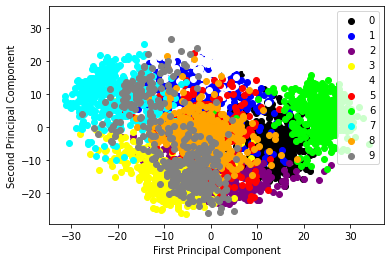

In [14]:
#pca主成分分析
from sklearn.decomposition import PCA
estimator=PCA(n_components=2)
X_pca=estimator.fit_transform(X_train)

from matplotlib import pyplot as plt 
def plot_pca_scatter():
    colors=["black","blue","purple","yellow","white","red","lime","cyan","orange","gray"]
    for i in range(len(colors)):
        px=X_pca[:,0][y_train.to_numpy()==i]
        py=X_pca[:,1][y_train.to_numpy()==i]
        plt.scatter(px,py,c=colors[i])
    
    plt.legend(np.arange(0,10).astype(str))
    plt.xlabel("First Principal Component")
    plt.ylabel("Second Principal Component")
    plt.show()

plot_pca_scatter()

In [13]:
import pandas as pd
X_train=vec.fit_transform(X_train.to_dict(orient="record"))
X_test=vec.fit_transform(X_test.to_dict(orient="record"))

In [20]:
#特征提取
measurements=[{'city':"Dubai","temperature":33.},{'city':"London","temperature":12.},{'city':"San Fransisco","temperature":18.}]

from sklearn.feature_extraction import DictVectorizer
vec=DictVectorizer()

print(vec.fit_transform(measurements))
print(vec.get_feature_names())
#使用pandas 进行特征转换方法：
# X_train.to_dict(orient="record")

            city  temperature
0          Dubai         33.0
1         London         12.0
2  San Fransisco         18.0


In [23]:
from sklearn.datasets import fetch_20newsgroups
news=fetch_20newsgroups(subset="all")

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(news.data,news.target,test_size=0.25,random_state=33)

#Countvectorize 不考虑词在全部文档的词频
from sklearn.feature_extraction.text import  CountVectorizer
count_vec=CountVectorizer()
X_count_train=count_vec.fit_transform(X_train)
X_count_test=count_vec.transform(X_test)

from sklearn.naive_bayes import MultinomialNB

mnb_count=MultinomialNB()

mnb_count.fit(X_count_train,y_train)

print(mnb_count.score(X_count_test,y_test))

0.8397707979626485


In [25]:
#TfidfVectorize 考虑词在全部文档的词频
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec=TfidfVectorizer()

X_tfidf_train=tfidf_vec.fit_transform(X_train)
X_tfidf_test=tfidf_vec.transform(X_test)

mnb_tfidf=MultinomialNB()

mnb_tfidf.fit(X_tfidf_train,y_train)
print(mnb_tfidf.score(X_tfidf_test,y_test))

0.8463497453310697


In [26]:
#使用停用词处理
count_filter_vec=CountVectorizer(analyzer="word",stop_words="english")
X_count_filter_train=count_filter_vec.fit_transform(X_train)
X_count_filter_test=count_filter_vec.transform(X_test)

mnb_count_filter=MultinomialNB()
mnb_count_filter.fit(X_count_filter_train,y_train)
mnb_count_filter.score(X_count_filter_test,y_test)

0.8637521222410866

In [64]:
#l1和l2正则化
from sklearn.linear_model import Lasso
lasso1=Lasso()
lasso1.fit(X_train,y_train)
lasso1.score(X_test,y_test)

from sklearn.linear_model import Ridge
Ridge1=Ridge()
Ridge1.fit(X_train,y_train)
Ridge1.score(X_test,y_test)

0.5050474537914386

In [ ]:
#超参数搜索

In [80]:
#网格搜索 单进程
from sklearn.datasets import fetch_20newsgroups
news=fetch_20newsgroups(subset="all")
import numpy as np
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(news.data[:3000],news.target[:3000],test_size=0.25,random_state=33)

from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
 
clf=Pipeline([("vect",TfidfVectorizer(stop_words="english",analyzer="word")),("svc",SVC())]) #管道整合特征提取和模型

parameters={"svc__gamma":np.logspace(-2,1,4),"svc__C":np.logspace(-1,1,3)} #参数下划线为两格

from sklearn.model_selection import  GridSearchCV

gs=GridSearchCV(clf,parameters,verbose=2,refit=True,cv=3,n_jobs=-1) 
#网格搜索 refit=true 会用最好的参数进行训练得到一个真正的模型 可以使用predict
#n_jobs =-1 代表使用全部cpu
%time _=gs.fit(X_train,y_train) #%time是ipython的magic命令
gs.best_params_,gs.best_score_

print(gs.score(X_test,y_test))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Wall time: 46.8 s
0.8226666666666667


In [1]:
#自然语言处理

In [11]:
sent1="The cat is walking in the bedroom."
sent2="A dog was running across the kitchen."
import nltk
#词汇分割
tokens_1=nltk.word_tokenize(sent1)
tokens_2=nltk.word_tokenize(sent2)

#输出词根 就是词原型
stemmer=nltk.stem.PorterStemmer()
stem_1=[stemmer.stem(t) for t in tokens_1]
stem_2=[stemmer.stem(t) for t in tokens_2]
#词性标注
pos_tag_1=nltk.tag.pos_tag(tokens_1)
pos_tag_2=nltk.tag.pos_tag(tokens_2)


In [12]:
from sklearn.datasets import fetch_20newsgroups
news=fetch_20newsgroups(subset="all")
X,y=news.data,news.target

from bs4 import BeautifulSoup
import nltk,re

In [19]:
#将句子拆成单个token
def news_to_sentence(news):
    news_text=BeautifulSoup(news).get_text()
    tokenizer=nltk.data.load("tokenizers/punkt/english.pickle")
    raw_sentences=tokenizer.tokenize(news_text)
    sentences=[]
    for sent in raw_sentences:
        sentences.append(re.sub("[^a-zA-Z]"," ",sent.lower().strip()).split())
    return sentences

sentences=[]

for x in X:
    sentences+=news_to_sentence(x)
from gensim.models import word2vec
#词向量维度
num_features=300
#被考虑词汇频度
min_word_count=20
#线程
num_workers=2
#上下文
context=5
downsampling=0.001

from gensim.models import word2vec

model=word2vec.Word2Vec(sentences,workers=num_workers,vector_size=num_features,min_count=min_word_count,window=context,sample=downsampling)

model.init_sims(replace=True)



D:\anaconda\envs\python36\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).


In [20]:
model.wv.most_similar("morning")

[('afternoon', 0.8316015005111694),
 ('weekend', 0.7808550000190735),
 ('evening', 0.7444403171539307),
 ('saturday', 0.7276070713996887),
 ('friday', 0.7031944394111633),
 ('night', 0.6788550615310669),
 ('sunday', 0.6784330010414124),
 ('thursday', 0.6499049663543701),
 ('summer', 0.6426658630371094),
 ('week', 0.6353022456169128)]

In [4]:
#tensorflow 
import tensorflow as tf
import numpy as np 

In [10]:
matrix1=tf.constant([[3.,3.]])
matrix2=tf.constant([[2.],[2.]])
product=tf.matmul(matrix1,matrix2)
linear=tf.add(product,tf.constant(2.0))

with tf.Session() as sess:
    result=sess.run(linear)
    print(result)

[[14.]]


In [41]:
import pandas as pd
column_names=["Clump Thickness","Uniformity of Cell Size","Single Epithlial Cell Size","Class"]
data=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",names=column_names)
data=data.replace(to_replace="?",value=np.nan)
data=data.dropna(how='any')
from sklearn.model_selection import  train_test_split
data_train,data_test=np.float32(data[column_names[0:3]]),np.float32(data[column_names[3]])
X_train,X_test,y_train,y_test=train_test_split(data_train,data_test,test_size=0.25,random_state=33)
X_train,y_train,X_test,y_test=X_train.T,y_train.T,X_test.T,y_test.T

(524, 3) (524,) (175, 3) (175,)
(3, 524) (524,) (3, 175) (175,)


In [44]:
y_train,y_test=np.reshape(y_train,(1,-1)),np.reshape(y_test,(1,-1))

b=tf.Variable(tf.zeros([1]))
W=tf.Variable(tf.random_uniform([1,3],-1.0,1.0))

y=tf.matmul(W,X_train)+b

loss=tf.reduce_mean(tf.square(y-y_train))

optimizer=tf.train.GradientDescentOptimizer(0.01)

train=optimizer.minimize(loss)

init=tf.initialize_all_variables()
sess=tf.Session()
sess.run(init)

for step in range(0,1000):
    sess.run(train)
    if step%200==0:
        print(step,sess.run(W),sess.run(b))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0 [[-0.27241695  0.8444808   0.14055192]] [0.02793792]
200 [[0.27825028 0.09541001 0.10186518]] [1.178979]
400 [[0.22493154 0.10328814 0.06503814]] [1.4879218]
600 [[0.20840879 0.10573053 0.0536253 ]] [1.5836551]
800 [[0.20328888 0.10648733 0.05008878]] [1.6133201]
